# 06. MCMC를 통한 베이즈 추론
* 통계학에서 MCMC 샘플링의 가장 중요한 용도는 베이지안 추론과 확률적 모델의 사후 분포에서 샘플을 추출하는 것

<br>

## 06-01. 베이즈 추론
- 관측값이 $D$이고, $\theta$ 매개변수를 가진 확률 모델이 $p(D|\theta)$,
    
    매개변수에 대한 사전분포가 $p(\theta)$라면,
    
    매개변수에 대한 사후분포는 베이즈 정리에 의해
    
$$\begin{equation}
 p(\theta | \mathcal{D})
  = \frac{p(\mathcal{D} | \theta) p(\theta)}{p(\mathcal{D})}
  = \frac{p(\mathcal{D} | \theta) p(\theta)}{\int_{\theta} p(\mathcal{D} | \theta) p(\theta) \;\mathrm{d}\theta}.
\end{equation}$$

- 일반적으로 $p(D|\theta)$와 $p(\theta)$는 알려져 있고 다루기 쉽지만, 분모에 적분이 있기 때문에 일반적으로 직접 계산될 수 없음

$$p(\mathcal{D}) = \int_{\theta} p(\mathcal{D} | \theta) p(\theta) \,\mathrm{d} \theta,$$

* **이는 한계 (Marginal) 가능도이며, 사후분포 관점에서의 정규화 상수**

<br>

#### 분산이 $\sigma^2_x$인 정규분포를 따르는 데이터 $\mathcal{D} = (x_1, \dots, x_n)$의 평균 $\mu$에 대한 베이지안 추론
- 관측값이 $\mu$에대해 조건부 독립이라면, 매개변수 $\theta = \{ \mu \}$에 대한 모델은

$$p(\mathcal{D} | \theta) = \prod_{i=1}^n p(x_i | \mu)
   = \prod_{i=1}^n \mathcal{N}(x_i ;\; \mu, \sigma_x^2).$$
   
- 모델에 대한 베이즈 추론을 위하여, 알려지지 않은 매개변수에 대한 사전분포 $p(\theta) = p(\mu)$가 필요
- 사전분포는 매개변수의 값에 대한 우리의 믿음을 반영
    
    (사전분포의 선택은 베이지안 모델링에서 중요한 문제)
    
    - 만약 아래의 사전분포를 가정한다면
        - $\mu_0$과 $\sigma^2_0$은 알려짐
        
    $$p(\mu) = \mathcal{N}(\mu ;\; \mu_0, \sigma_0^2)$$

- 이 경우 사전분포는 사후분포의 정확한 도출을 가능하게 하는 특정형태를 가짐

$$p(\mu | \mathcal{D}) \propto p(\mathcal{D} | \mu) p(\mu)
  = \prod_{i=1}^n \mathcal{N}(x_i ;\; \mu, \sigma_x^2)
  \mathcal{N}(\mu ;\; \mu_0, \sigma_0^2).$$

- 로그를 취하고 모든 상수를 무시하면, 다음과 같이 간소화

$$\begin{align*}
  \log p(\mu | \mathcal{D}) &= \sum_{i=1}^n - \frac{(x_i - \mu)^2}{2 \sigma_x^2}
   - \frac{(\mu - \mu_0)^2}{2 \sigma_0^2} + C \\
   &= - \frac{n \left( \frac{1}{n}\sum_{i=1}^n x_i - \mu\right)^2}{2 \sigma_x^2}
     - \frac{(\mu - \mu_0)^2}{2 \sigma_0^2} + C'.
\end{align*}$$

- $\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$이기에,
    
$$\begin{align*}
 \log p(\mu | \mathcal{D}) &= 
  - \frac{n ( \bar{x} - \mu)^2}{2 \sigma_x^2}
  - \frac{(\mu - \mu_0)^2}{2 \sigma_0^2} + C' \\
  &= - \frac{n \sigma_0^2 ( \bar{x} - \mu)^2
  + \sigma_x^2 (\mu - \mu_0)^2}{2 \sigma_x^2 \sigma_0^2} + C' \\
  &= - \frac{n \sigma_0^2 (\bar{x}^2 - 2 \bar{x} \mu + \mu^2)
  + \sigma_x^2 (\mu^2 - 2 \mu \mu_0 + \mu_0^2)}{2 \sigma_x^2 \sigma_0^2} + C' \\
  &= - \frac{(n \sigma_0^2 + \sigma_x^2) \mu^2 - 2 (n \sigma_0^2 \bar{x} + \sigma_x^2 \mu_0) \mu + n \sigma_0^2 \bar{x}^2 + \sigma_x^2 \mu_0^2)}{2 \sigma_x^2 \sigma_0^2} + C' \\
  &= - (n \sigma_0^2 + \sigma_x^2) \frac{\mu^2 - 2 \frac{n \sigma_0^2 \bar{x} + \sigma_x^2 \mu_0}{n \sigma_0^2 + \sigma_x^2} \mu + \frac{n \sigma_0^2 \bar{x}^2 + \sigma_x^2 \mu_0^2}{n \sigma_0^2 + \sigma_x^2}}{2 \sigma_x^2 \sigma_0^2} + C' \\
  &= -(n \sigma_0^2 + \sigma_x^2) \frac{[\mu^2 - \frac{n \sigma_0^2 \bar{x} + \sigma_x^2 \mu_0}{n \sigma_0^2 + \sigma_x^2}]^2}{2 \sigma_x^2 \sigma_0^2} + C''
\end{align*}$$

<br>

- 이는 아래의 값을 매개변수로 가지는 정규분포 $\mathcal{N}(\mu;\; \mu_{\mu}^*, \sigma_{\mu}^{2^*})$

$$\begin{align*}
  \mu_{\mu}^* &= \frac{n \sigma_0^2 \bar{x} + \sigma_x^2 \mu_0}{n \sigma_0^2 + \sigma_x^2} \\
  \sigma_{\mu}^{2^*} &= \frac{\sigma_x^2 \sigma_0^2}{n \sigma_0^2 + \sigma_x^2}
  	       = \left( \frac{n}{\sigma_x^2} + \frac{1}{\sigma_0^2} \right)^{-1}.
\end{align*}$$

- 사전분포가 가능도와 결합되어, 사후분포가 사후분포와 같은 함수 형태를 가짐

    $\rightarrow$ 켤레분포 (Conjucate)

<br>

## 06-02. MCMC를 통한 사후분포 추론
- **정규화상수는 일반적으로 직접 계산하기 쉽지 않음**
- MH 알고리즘은, 정규화 되지 않은 밀도함수에서도 작동할 수 있기에, 사후분포 샘플링은 MCMC 응용에 적합

- 주어진 데이터 세트에 대해, MH알고리즘을 적용
    - 타겟분포 : $\log \pi^*(\theta) = \log p(\mathcal{D} | \mu) + \log p(\mu) = \sum_{i=1}^n \log \mathcal{N}(x_i ;\; \mu, \sigma_x^2) + \log \mathcal{N}(\mu ;\; \mu_0, \sigma_0^2).$
    - $\sigma_x^2 = 1, \mu_0 = 0, \sigma_0^2 = 3^2$로 고정
    

- 제안분포를 $q(\theta' ; \theta) = \mathcal{N}(\theta';\; \theta, \sigma_{\text{prop}}^2),$로 사용하여, 이를 구현

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

- 정규분포의 pdf정의

In [6]:
def lnormpdf(x, mu, sigma):
    return np.sum(-0.5*np.log(2*np.pi) - np.log(sigma) - 0.5 * (x-mu)**2/sigma**2)

- 타겟분포의 로그-pdf를 가능도와 사전분포항의 합으로 정의 : $\log \mathcal{N}(x_i ;\; \mu, \sigma_x^2)
     		   + \log \mathcal{N}(\mu ;\; \mu_0, \sigma_0^2).$

In [7]:
def target(mu, data, sigma_x, mu0, sigma0):
    return lnormpdf(data, mu, sigma_x) + lnormpdf(mu, mu0, sigma0)

- $\mu=0.5$인 정규분포를 따르는 관측값

In [8]:
n = 100
data = 0.5 + npr.normal(size=n)

- 사전분포 매개변수

In [9]:
sigma_x = 1.0
mu0 = 0.0
sigma0 = 3.0

In [15]:
def mhsample1(theta0, n, logtarget, drawproposal):
    theta = theta0
    thetas = np.zeros(n)
    accepts = 0
    
    for i in range(n):
        theta_prop = drawproposal(theta)
        if np.log(npr.rand()) < logtarget(theta_prop) - logtarget(theta):
            theta = theta_prop
            accepts += 1
            
        thetas[i] = theta
        
    print("Sampler acceptance rate:", accepts/n)
    return thetas

In [16]:
theta = mhsample1(0.0, 10000,
                  lambda mu: target(mu, data, sigma_x, mu0, sigma0),
                  lambda theta: theta+0.2*npr.normal())

Sampler acceptance rate: 0.5028


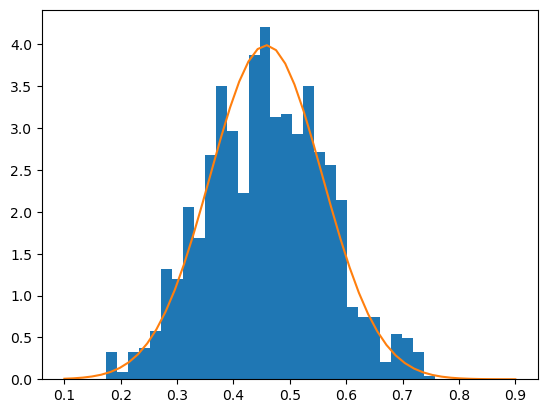

In [19]:
theta = theta[len(theta)//2:]
plt.hist(theta, 30, density=True)

tt = np.linspace(0.1, 0.9, 50)
m_post = sigma0**2 * np.sum(data) / (n*sigma0**2 + sigma_x**2)
s2_post = 1/(n/sigma_x**2 + 1/sigma0**2)
y = np.array([np.exp(lnormpdf(t, m_post, np.sqrt(s2_post))) for t in tt])
plt.plot(tt, y)
plt.show()

<br>

## 06-03. 제한된 변수 샘플링 (Sampling bounded variables)
- 많은 확률 모델에는 몇 가지 제약 조건이 있는 변수가 포함
    * 예) 분산은 양수

- 더 엄밀히, 변수 집합 $\theta_I$가 있고, 이 변수들은 $\theta_I \in B$라는 범위 내에 있어야 한다고 가정한다면,
    
    이러한 변수를 다루는 방법에는 세 가지 접근 방식이 존재

<br>

### 01. 영가능도 (Zero likelihood)
- 만약 $\theta_I \notin B$인 경우 타겟 확률분포 $P^*(\theta)= 0$으로 정의된다면, 일반적인 조건 하에서 MH알고리즘은 올바른 분포로 수렴
    - 당연히 이런 상태로 이동하는 모든 제안값은 $a=0$때문에 수용되지 않음

<br>

- 수용되지 않을 것이 명백한 값들이 여러번 제안되어야 하기 때문에, 이러한 접근법은 비효율적
    
    - 예) $d$개의 양의 변수에 대하여, 원점 근처에서 시작하는 대칭적인 제안분포를 사용하는 경우, 변수 중 하나라도 음수가 되는 제안값들은 모두 거부되므로, 
        
        모든 변수가 양수여야 한다는 조건에 따라 수용확률은 대략 $2^{-d}$정도가 됨

<br>

### 02. 제약조건을 반영하는 제안분포
- 제안분포는 범위를 벗어나는 움직임을 제안하지 않도록 수정될 수 있음

#### 양수 조건 $\theta_i > 0$을 만족해야하는 경우
- $\theta_i > 0$인 경우, 이 제약조건을 강제하는 한 가지 방법은 $\theta^{'} = |\theta^{'}_0|$로 제안하는 것
    - $\theta_0'$는 임의의 제안분포 $q_0(\theta_0' ; \theta)$를 따름

$$q(\theta' ; \theta) = 
\begin{cases} q_0(\theta' ; \theta) + q_0(-\theta' ; \theta), \quad &\theta' > 0, \\
q_0(\theta' ; \theta), & \theta' = 0.
\end{cases}$$


- $q_0(\theta' ; \theta)$가 $q_0(\theta' ; \theta) = q_s(\theta' - \theta)$인 대칭 제안 분포이며, 여기서 $q_s$도 대칭이라고 가정하면,

$$q(\theta' ; \theta) = q_s(\theta' - \theta) + q_s(\theta' + \theta),$$로 대칭이며, $$q(\theta' ; \theta) = q(\theta ; \theta')$$

- 이러한 특별한 제안 방식은 실제로 $q(\theta' ; \theta) = q(\theta ; \theta')$가 되는지 확인하거나, 그렇지 않은 경우에는 수용비율에 $\frac{q(\theta^{(t)} ; \theta')}{q(\theta' ; \theta^{(t)})}$요인을 포함해야 하는지를 반드시 확인해야 함

<br>

### 03. 제약이 없는 변수로의 변환
- 변수를 제약이 없는 변수로 변환하는 변수 변환
- $g$가 $\phi_I \in \mathbb{R}^d$ (어떠한 제약조건도 없음)인 부드럽고 가역적인 변환함수이고, $\theta_I$이 $g(\phi_i)$일 때,

    - 만약 $\theta_i >0$인 경우, $g(\phi)=exp(\phi)$
    - 만약 $\theta_i \in (0, 1)$인 경우, $g(\phi) = \frac{1}{1+exp(-\phi)}$를 선택
        
        $\rightarrow$ 로지스틱 변환
    - 만약 $i \in I$에 대해 $\theta_i \in (0, 1)$이고, $\sum_{i\in I} \theta_i=1$인 경우, 각 $i$에 대해 $g_i(\phi) = \frac{\exp(\phi_i)}{\sum_{i' \in I} \exp(\phi_{i'})},$를 선택
    
        $\rightarrow$ 소프트맥스 변환
        
        - 이 경우, $d$차원인 $\theta_I$는 정규화 조건 때문에, 자유도가 $d-1$에 불과

- **변수에 대한 변환은 확률 모델 내에서 반드시 고려되어야 함**
- 모델의 가능도는 모델 매개변수의 변환에 대해 불변
    
    즉, $$p(\mathcal{D} | \theta) = p(\mathcal{D} | g(\phi)) = p(\mathcal{D} | \phi),$$
    
- 그러나 사전분포는 확률분포의 변환 규칙에 따라 변환됨

$$p_{\phi}(\phi) = p_{\theta}(g(\phi)) \left| J_g \right|,$$여기서 $J_g$는 $g$의 자코비안 행렬의 행렬식 절댓값을 의미

<br>

#### 예)
- $\theta_i >0$인 경우에 $g(\phi)=exp(\phi)$를 사용하여 변환하면,

$$p(\phi) = p_{\theta}(\exp(\phi)) \exp(\phi).$$

- 만약 $\theta \sim Exponential(\lambda)$이고, $p(\theta|\lambda)=\lambda exp(-\lambda \theta)$라고 가정하면, $\phi =log(\theta)$에 대해

$$p(\phi | \lambda) = \lambda \exp(-\lambda \exp(\phi)) \exp(\phi).$$

<br>

### 04. 로지스틱 변환 변수를 이용한 샘플링
- 이항 모델의 파라미터 $\theta=p \in[0, 1]$에 대해 샘플링하는 경우,
    
    실수공간의 $\phi \in \mathbb{R}$를 로지스틱 변환을 사용하여 제약이 있는 변수 $\theta$로 변환
    
$$\mathrm{logistic}(\phi) = \frac{1}{1 + \exp(-\phi)}.$$

- $\theta$에서 $\phi$로의 역변환은

$$\mathrm{logistic}^{-1}(\theta) = \log \left(\frac{\theta}{1 - \theta}\right).$$

- 샘플링을 위해 $\theta$에 대해 정의된 사전분포를 $\phi$에 대한 사전분포로 변환하기 위해서는 다음 변환식을 사용

$$p_\phi(\phi) = p_\theta(\mathrm{logistic}(\phi)) \frac{\mathrm{d}}{\mathrm{d}\phi} \mathrm{logistic}(\phi).$$

- 여기서 로지스틱 함수의 도함수는

$$\frac{\mathrm{d}}{\mathrm{d}\phi} \mathrm{logistic}(\phi) =
\frac{\exp(-\phi)}{\left( 1 + \exp(-\phi)\right)^2}.$$

In [20]:
def logistic(x):
    return 1/(1+np.exp(-x))
 
def dlogistic(x):
    return np.exp(-x)/(1+np.exp(-x))**2
 
def invlogistic(y):
    return np.log(y / (1-y))

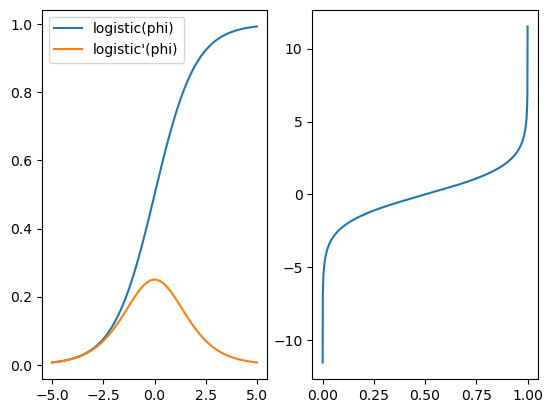

In [21]:
fig, ax = plt.subplots(1, 2)
t = np.linspace(-5, 5, 100)
ax[0].plot(t, logistic(t), label="logistic(phi)")
ax[0].plot(t, dlogistic(t), label="logistic'(phi)")
ax[0].legend()

t2 = np.linspace(1e-5, 1-1e-5, 1000)
ax[1].plot(t2, invlogistic(t2))
plt.show()

<br>

#### MCMC에 대한 로지스틱 변환
- $p(\mathcal{D} | \theta) = \mathrm{Binom}(k;\; n, \theta)
\propto \theta^k (1-\theta)^{n-k}.$인 확률모델에서 MCMC샘플링을 위한 로지스틱 변환 적용
- 사전분포는 
$$p(\theta) = \mathrm{Uniform}(\theta;\; 0.25, 0.75).$$

- $\theta$에 대한 비정규화된 로그 가능도

In [22]:
def llikelihood(theta, k, n):
    return k*np.log(theta) + (n-k)*np.log(1-theta)

- $\theta$에 대한 로그 사전분포

In [23]:
def lprior(theta, lower, upper):
    if theta > lower and theta < upper:
        return np.log(1/(upper-lower))
    else:
        return -np.inf

- $\phi$에 대한 로그 사전 변환

In [24]:
def lprior_t(phi):
    return lprior(logistic(phi), 0.25, 0.75) + np.log(dlogistic(phi))

In [25]:
k = 60
n = 100

- $\phi$에 대한 로그 타겟 분포

In [26]:
def ltarget_t(phi):
    return llikelihood(logistic(phi), k, n) + lprior_t(phi)

In [27]:
theta0 = 0.5
phi = mhsample1(invlogistic(theta0), 10000,
                ltarget_t, lambda phi: phi + npr.randn(1))

Sampler acceptance rate: 0.2398


C:\Users\user\AppData\Local\Temp\ipykernel_40516\1604245064.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  thetas[i] = theta


In [28]:
phi = phi[len(phi)//2:]
theta = logistic(phi)
print(np.percentile(theta, [2.5, 50, 97.5]))

[0.50496003 0.59958511 0.68650077]


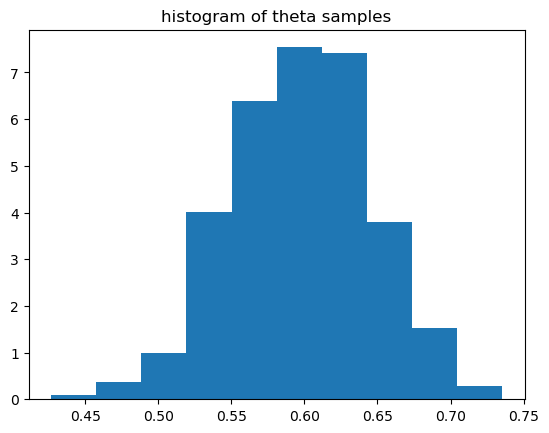

In [29]:
plt.hist(theta, density=True)
plt.title('histogram of theta samples')
plt.show()

<br>

### 05. 확률밀도 변환의 정당성
- 확률밀도 변환에 대한 규칙은 적분에 대한 변수 변환 법칙에서 직접적으로 파생

- $\theta=g(\phi)$를 가정하고, ($g$ 는 미분가능하며, $g$의 도함수는 적분 가능함)
    
    연속 함수 $f(\theta)$의 정적분을 계산하기 위해, 
    
$$\int\limits_{g(a)}^{g(b)} f(\theta) \,\mathrm{d}\theta
= \int\limits_{a}^{b} f(g(\phi)) \frac{\,\mathrm{d} \theta}{\,\mathrm{d} \phi} \,\mathrm{d} \phi.$$이는 변수 변환 공식 $$f_\phi(\phi) = f_\theta(g(\phi)) \frac{\,\mathrm{d} \theta}{\,\mathrm{d} \phi}
  = f_\theta(g(\phi)) g'(\phi).$$으로 도출
  
- 한편, 확률밀도는 항상 양수여야 하는데, $g^{'}(\phi)$가 음수일 수도 있으므로, 확률밀도함수의 경우에는 절대값을 취해서

$$f_\phi(\phi) = f_\theta(g(\phi)) \frac{\,\mathrm{d} \theta}{\,\mathrm{d} \phi}
  = f_\theta(g(\phi)) |g'(\phi)|.$$

<br>

### 06. 밀도 변환의 수치적인 예시

In [30]:
import scipy.integrate as si

- $p_\theta (\theta) = l \cdot exp(-l \theta)$

In [36]:
def p_theta(theta, l):
    return l * np.exp(-l * theta)

- $p_\phi(\phi) = p_{\theta}(g(\phi)) \cdot |\frac{d}{d\phi} g(\phi)|$
    - $g(\phi) = exp(\phi)$이고, $g^{'}(\phi)=exp(\phi)$이므로,
    
$$p_{\phi}(\phi) = l \cdot exp(-l\cdot exp(\phi))\cdot exp(\phi)$$

$\phi \in \mathbb{R}$

In [37]:
def p_phi(phi, l):
    return l * np.exp(-l * np.exp(phi)) * np.exp(phi)

- 정규화 상수 $\int^{\infty}_{0} p(\theta) d\theta = 1$

In [32]:
print('p_theta normaliser:', si.quad(lambda theta: p_theta(theta, 2.0), 0, np.inf))

p_theta normaliser: (1.0, 1.547006336759497e-10)


- 정규화 상수 $\int^{\infty}_{-\infty} p_{\phi}(\phi) d\phi = 1$

In [33]:
print('p_phi normaliser:  ', si.quad(lambda phi: p_phi(phi, 2.0), -100, 100))

p_phi normaliser:   (0.9999999999999987, 2.5196432985839586e-10)


- 확률 비교 : 두 밀도 함수가 동일한 사건에 대해 같은 확률을 부여하는지 확인
    - $\phi \in [1, exp(1)]$에 해당 $\rightarrow$ $\theta = exp(\phi)$에 의해 $\phi \in [0, 1]$과 등치
    
    - $p_\theta$에 대해 $\theta \in [1, exp(1)]$구간에서 확률을 적분하고
        
        $p_\phi$에 대해 $\phi \in [0, 1]$구간에서 확률을 적분
        
        $\rightarrow$ **두 결과가 거의 동일한 값을 가지면, 변수 변환이 올바르게 적용된 것**

In [34]:
print('p_theta probability:', si.quad(lambda theta: p_theta(theta, 2.0), 1, np.exp(1)))

p_theta probability: (0.13098086236189044, 1.4541796917942933e-15)


In [35]:
print('p_phi probability:  ', si.quad(lambda phi: p_phi(phi, 2.0), 0, 1))

p_phi probability:   (0.13098086236189044, 1.4541796917942933e-15)
